In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teste = pd.read_csv(r'./kaggle_files/test.csv')
treino = pd.read_csv(r'./kaggle_files/train.csv')

In [3]:
display(treino.head(4))
display(teste.head(4))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [4]:
(treino.isnull().sum().sort_values(ascending=False)/treino.shape[0])[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [5]:
treino[['PoolQC','MiscFeature','Alley','Fence']]= treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

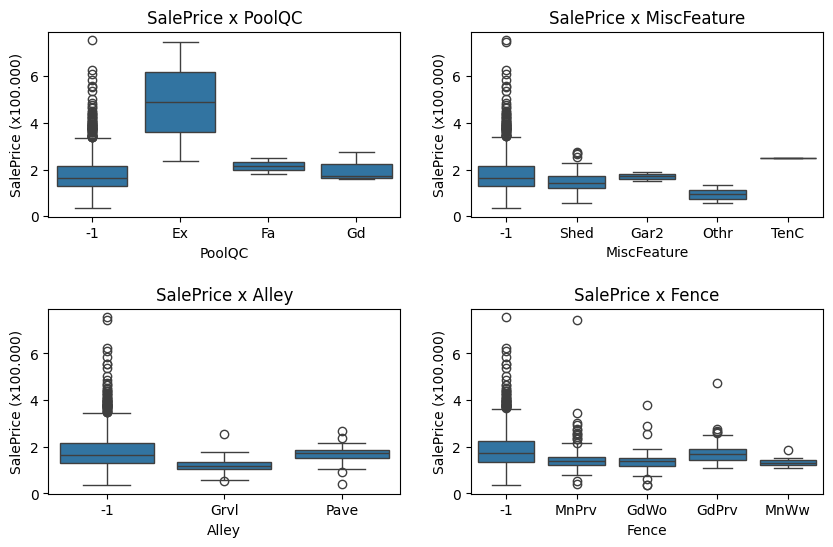

In [6]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,6))

sns.boxplot(data=treino, x=treino.PoolQC,y=treino.SalePrice/100000,ax=ax[0,0])
ax[0,0].set_ylabel('SalePrice (x100.000)')
ax[0,0].set_title('SalePrice x PoolQC')
sns.boxplot(data=treino, x=treino.MiscFeature,y=treino.SalePrice/100000,ax=ax[0,1])
ax[0,1].set_ylabel('SalePrice (x100.000)')
ax[0,1].set_title('SalePrice x MiscFeature')
sns.boxplot(data=treino, x=treino.Alley,y=treino.SalePrice/100000,ax=ax[1,0])
ax[1,0].set_ylabel('SalePrice (x100.000)')
ax[1,0].set_title('SalePrice x Alley')
sns.boxplot(data=treino, x=treino.Fence,y=treino.SalePrice/100000,ax=ax[1,1])
ax[1,1].set_ylabel('SalePrice (x100.000)')
ax[1,1].set_title('SalePrice x Fence')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [7]:
teste.shape

(1459, 80)

In [8]:
teste[['PoolQC','MiscFeature','Alley','Fence']]= teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [9]:
# Analisando coluna FireplaceQu
## Fireplaces: Number of fireplaces
## FireplaceQu: Fireplace quality
treino[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
Name: count, dtype: int64

- O NaN indica que nao existe lareira

In [10]:
treino[['FireplaceQu']] = treino[['FireplaceQu']].fillna(-1)

In [11]:
teste[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
Name: count, dtype: int64

In [12]:
teste[['FireplaceQu']] = teste[['FireplaceQu']].fillna(-1)

In [13]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(10)

MasVnrType      0.597260
LotFrontage     0.177397
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
GarageCond      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
dtype: float64

In [14]:
# Verificando a quantidade de valores
treino.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      872
LotFrontage     259
GarageFinish     81
GarageYrBlt      81
GarageQual       81
GarageCond       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
dtype: int64

<a id=LotFrontage></a>
- **<font color='blue'>LotFrontage</font>: Pés lineares (medida de distância) de rua conectados à propriedade**

In [15]:
# Entendendo os tipos de propriedades que possuem valor nulo
treino.loc[treino.LotFrontage.isnull(),'LotConfig'].value_counts()

LotConfig
Inside     134
Corner      62
CulDSac     49
FR2         14
Name: count, dtype: int64

In [16]:
# Verificando a média por tipo de propriedade
treino.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

- Nesse caso o valor vazio **parece um erro da base**

In [17]:
# Substituindo os valores vazios pela média em relação ao LotConfig
treino['LotFrontage'] = treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))
# Fazendo para a base de teste
teste['LotFrontage'] = teste['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))

<a id="garagem"></a>
- **Avaliando as <font color='blue'>colunas de garagem</font>**
    - **GarageType**: Garage location
        - **NA: No Garage**
    - **GarageYrBlt**: Year garage was built
	- **GarageFinish**: Interior finish of the garage
        - **NA: No Garage**		
    - **GarageCars**: Size of garage in car capacity
	- **GarageArea**: Size of garage in square feet
	- **GarageQual**: Garage quality
        - **NA: No Garage**		
	- **GarageCond**: Garage condition
        - **NA: No Garage**		

In [18]:
# Verificando as colunas que possuem garagem no nome
col_garagem = treino.columns[treino.columns.str.contains("Garage")]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [19]:
# Filtrando a base
treino.loc[treino.GarageType.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
Name: count, dtype: int64

- **O NaN em todas essas colunas é que não existe garagem**

In [20]:
# Podemos selecionar apenas as colunas vazias
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN


In [21]:
# Verificando os valores
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           81
Name: count, dtype: int64

In [22]:
# E substituir esses valores por -1
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

In [23]:
# Verificando novamente quando a quantidade de carros é igual a 0
treino.loc[treino.GarageCars == 0,col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
-1          -1.0         -1            0           0           -1          -1            81
Name: count, dtype: int64

In [24]:
# Resumindo os valores vazios da base de treino
treino.isnull().sum().sort_values(ascending=False).head(9)

MasVnrType      872
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtQual         37
BsmtCond         37
MasVnrArea        8
Electrical        1
FireplaceQu       0
dtype: int64

In [25]:
# Verificando os valores
teste.loc[teste.GarageCond.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
Name: count, dtype: int64

- Para Base de teste

In [26]:
# Verificando os valores
teste.loc[teste.GarageCond.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
Name: count, dtype: int64

- Tratando a linha onde GarageCars é zero e tudo é vazio

In [27]:
# Analisando a condição de GarageType ser nulo
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           76
Name: count, dtype: int64

In [28]:
# E substituir esses valores por -1
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

- Agora vamos entender as colunas com tudo vazio mas GarageType = "Detchd"

In [29]:
# Entendendo essas colunas
teste.loc[teste.GarageCond.isnull(),col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
teste2 = teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageYrBlt != -1)]

In [31]:
teste2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 11 to 1456
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             392 non-null    int64  
 1   MSSubClass     392 non-null    int64  
 2   MSZoning       390 non-null    object 
 3   LotFrontage    392 non-null    float64
 4   LotArea        392 non-null    int64  
 5   Street         392 non-null    object 
 6   Alley          392 non-null    object 
 7   LotShape       392 non-null    object 
 8   LandContour    392 non-null    object 
 9   Utilities      391 non-null    object 
 10  LotConfig      392 non-null    object 
 11  LandSlope      392 non-null    object 
 12  Neighborhood   392 non-null    object 
 13  Condition1     392 non-null    object 
 14  Condition2     392 non-null    object 
 15  BldgType       392 non-null    object 
 16  HouseStyle     392 non-null    object 
 17  OverallQual    392 non-null    int64  
 18  OverallCond  

In [32]:
teste2[["GarageYrBlt","YearBuilt","GarageArea"]].corr()

,GarageYrBlt,YearBuilt,GarageArea
GarageYrBlt,1.000000,0.615951,0.494670
YearBuilt,0.615951,1.000000,0.218711
GarageArea,0.494670,0.218711,1.000000


In [33]:
# Vamos verificar os valores quando GarageType == "Detchd"
teste2[["GarageYrBlt","YearBuilt","GarageArea"]].corr()['GarageYrBlt'].sort_values(ascending=False).head(3)

GarageYrBlt    1.000000
YearBuilt      0.615951
GarageArea     0.494670
Name: GarageYrBlt, dtype: float64

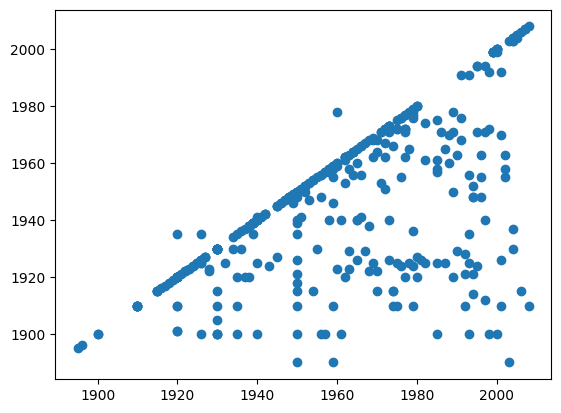

In [34]:
# Visualizando essa correlação
fig, ax = plt.subplots()

ax.scatter(teste2.GarageYrBlt,teste2.YearBuilt)

plt.show()

In [35]:
# Verificando a nova coluna
teste['CheckAnos'] = teste.GarageYrBlt == teste.YearBuilt
teste.CheckAnos.value_counts()

CheckAnos
True     1127
False     332
Name: count, dtype: int64

In [36]:
# Apagando essa coluna
teste = teste.drop('CheckAnos',axis=1)

In [37]:
# Verificando os valores de construção da casa
teste.loc[teste.GarageCond.isnull(),'YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [38]:
# Substituindo as colunas vazias pelo ano de construção da casa
teste.loc[teste.GarageCond.isnull(),'GarageYrBlt'] = teste.loc[teste.GarageCond.isnull(),'YearBuilt']

- E a coluna GarageFinish

In [39]:
# Verificando os valores mais frequentes
teste.loc[(teste.GarageType == 'Detchd'),'GarageFinish'].value_counts()

GarageFinish
Unf    365
RFn     15
Fin     10
Name: count, dtype: int64

In [40]:
# Vamos verificar os valores quando GarageType == "Detchd"
moda_GarageFinish = teste.loc[(teste.GarageType == 'Detchd'),'GarageFinish'].mode()[0]
moda_GarageFinish

'Unf'

In [41]:
# Podemos substituir pelo valor mais frequente
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageFinish.isnull()),'GarageFinish'] = moda_GarageFinish

- Fazendo o mesmo para GarageQual e GarageCond

In [42]:
# Vamos verificar os valores quando GarageType == "Detchd"
teste.loc[(teste.GarageType == 'Detchd'),['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            309
Fa          TA             38
            Fa             19
TA          Fa             16
Fa          Po              3
Gd          Ex              1
Po          Fa              1
            Po              1
TA          Gd              1
            Po              1
Name: count, dtype: int64

In [43]:
# Podemos verificar a moda dessa coluna
moda_GarageQual = teste.loc[(teste.GarageType == 'Detchd'),'GarageQual'].mode()[0]
moda_GarageCond = teste.loc[(teste.GarageType == 'Detchd'),'GarageCond'].mode()[0]
print(moda_GarageQual,moda_GarageCond)

TA TA


In [44]:
# E usar esse valor no GarageQual
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageQual.isnull()),'GarageQual'] = moda_GarageQual

In [45]:
# E fazer o mesmo para GarageCond
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageCond.isnull()),'GarageCond'] = moda_GarageCond

- Para finalizar as colunas de garagem, vamos tratar GarageCars e GarageArea

In [46]:
# Agora vamos visualizar a média desses valores quando GarageType == "Detchd"
media_carros = teste.loc[(teste.GarageType == 'Detchd'),['GarageCars','GarageArea']].mean()
media_carros

GarageCars      1.519182
GarageArea    412.202046
dtype: float64

In [47]:
# Como Não podemos ter meio carro, vamos arredondar os valores
media_carros = round(media_carros,0)
media_carros.values

array([  2., 412.])

In [48]:
# Podemos usar esses valores se a média for vazia
teste.loc[(teste.GarageType == 'Detchd'),['GarageCars','GarageArea']] = media_carros.values

In [49]:
# Visualizando os tratamentos feitos
teste.iloc[[666,1116],55:70]

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
666,Typ,0,-1,Detchd,1910.0,Unf,2.0,412.0,TA,TA,Y,64,0,180,0
1116,Typ,0,-1,Detchd,1923.0,Unf,2.0,412.0,TA,TA,Y,174,0,212,0


In [50]:
# Resumindo os valores vazios da base de teste
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      894
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
BsmtFullBath      2
Utilities         2
dtype: int64

<a id="porao"></a>
- **E fazendo a mesma coisa para as <font color='red'>colunas de Porão</font>**
    - **NA: No Basement**

In [51]:
# Verificando as colunas que possuem porão no nome e possuem valores vazios
col_porao = treino.columns[treino.columns.str.contains("Bsmt") & (treino.isnull().any())]
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [52]:
# Analisando os valores
treino.loc[treino.BsmtFinType2.isnull(),col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
Gd        TA        No            GLQ           NaN              1
Name: count, dtype: int64

In [53]:
treino.loc[treino.BsmtFinType2.isnull(),['BsmtFinType2','BsmtFinSF2']].value_counts(dropna=False)

BsmtFinType2  BsmtFinSF2
NaN           0             37
              479            1
Name: count, dtype: int64

In [54]:
# Verificando os dados na mesma condição
moda_BsmtFinType2 = treino.BsmtFinType2.mode()[0]
moda_BsmtFinType2

'Unf'

In [55]:
# Substituindo esse valor por Unf
treino.loc[(treino.BsmtFinType2.isnull()) & (treino.BsmtFinSF2 != 0),['BsmtFinType2','BsmtFinSF2']] = moda_BsmtFinType2

C:\Users\braul\AppData\Local\Temp\ipykernel_25756\1199133223.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unf' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  treino.loc[(treino.BsmtFinType2.isnull()) & (treino.BsmtFinSF2 != 0),['BsmtFinType2','BsmtFinSF2']] = moda_BsmtFinType2


In [56]:
# Verificando os valores com BsmtQual vazio
treino.loc[treino.BsmtQual.isnull(),col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
Name: count, dtype: int64

In [57]:
# Substituindo os valores sem porão por -1
treino.loc[treino.BsmtQual.isnull(),col_porao] = -1

In [58]:
# Visualizando os valores vazios
treino.isnull().sum().sort_values(ascending=False).head(5)

MasVnrType      872
MasVnrArea        8
BsmtExposure      1
Electrical        1
KitchenAbvGr      0
dtype: int64

In [59]:
# Analisando os valores
treino.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
-1     37
Name: count, dtype: int64

In [60]:
# E novamente podemos ver o valor mais frequente
moda_BsmtExposure = treino.BsmtExposure.mode()[0]
moda_BsmtExposure

'No'

In [61]:
# Substituindo esse valor por "No" (mais frequente)
treino.loc[treino.BsmtExposure.isnull(),'BsmtExposure'] = moda_BsmtExposure

- O mesmo para **<font color='blue'>teste</font>**

In [62]:
# Visualizando as colunas vazias de porão da base de treino
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [63]:
# E agora visualizando para a base de teste
col_porao_teste = teste.columns[teste.columns.str.contains("Bsmt") & (teste.isnull().any())]
col_porao_teste

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [64]:
# Analisando os valores
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
          Fa        No            Unf           0.0         Unf           0.0         173.0      173.0        0.0           0.0              1
          TA        No            Unf           0.0         Unf           0.0         356.0      356.0        0.0           0.0              1
          NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
Name: count, dtype: int64

- Começando a tratar a coluna BsmtQual

In [65]:
# Analisando essas linhas
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),col_porao_teste]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [66]:
# Podemos verificar o valor mais frequente
teste.BsmtQual.mode()[0]

'TA'

In [67]:
teste[(teste.BsmtCond == 'Fa') & (teste.BsmtExposure =='No')].BsmtQual.mode()[0]

'TA'

In [68]:
teste.groupby(['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'])['BsmtQual'].agg(pd.Series.mode).head(3)

BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
Fa        Av            BLQ           Rec             Gd
                        GLQ           Unf             Gd
                        LwQ           Unf             TA
Name: BsmtQual, dtype: object

In [69]:
#qual seria a moda para esse conjunto de colunas em relacao a BsmtQual
teste.groupby(['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'])['BsmtQual'].transform(lambda x: pd.Series.mode(x)[0]).head()

0    TA
1    TA
2    Gd
3    Gd
4    TA
Name: BsmtQual, dtype: object

In [70]:
# E usar esse valor para substituir as linhas acima
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),'BsmtQual'] = teste.BsmtQual.mode()[0]

In [71]:
# Visualizando essas linhas
teste.iloc[757:759,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
757,TA,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA
758,TA,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA


In [72]:
teste.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- Agora tratando as outras colunas

In [73]:
teste.loc[teste.BsmtQual.isnull(),['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']] = 0

In [74]:
teste.loc[teste.BsmtQual.isnull(),['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = -1

In [75]:
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      894
MasVnrArea       15
MSZoning          4
BsmtCond          3
Utilities         2
BsmtExposure      2
Functional        2
KitchenQual       1
Exterior2nd       1
Exterior1st       1
dtype: int64

In [76]:
teste.loc[teste.BsmtCond.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        NaN       Mn            GLQ           1044.0      Rec           382.0       0.0        1426.0       1.0           0.0             1
TA        NaN       Av            ALQ           755.0       Unf           0.0         240.0      995.0        0.0           0.0             1
                    No            BLQ           1033.0      Unf           0.0         94.0       1127.0       0.0           1.0             1
Name: count, dtype: int64

In [77]:
teste.BsmtCond.mode()[0]

'TA'

In [78]:
teste.loc[teste.BsmtCond.isnull(),'BsmtCond'] = teste.BsmtCond.mode()[0]

In [79]:
teste.loc[teste.BsmtExposure.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        TA        NaN           Unf           0.0         Unf           0.0         725.0      725.0        0.0           0.0             1
                                                                                      1595.0     1595.0       0.0           0.0             1
Name: count, dtype: int64

In [80]:
teste.loc[teste.BsmtExposure.isnull(),'BsmtExposure'] = teste.BsmtExposure.mode()[0]

In [81]:
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      894
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
Exterior2nd       1
SaleType          1
Exterior1st       1
KitchenQual       1
TotRmsAbvGrd      0
dtype: int64

<a id="restante"></a>
- Sendo as colunas:
    - **<font color='blue'>MasVnrType</font>**: Tipo de cobertura de alvenaria
        - **None: None**
    - **<font color='blue'>MasVnrArea</font>**: Área de cobertura de alvenaria em pés quadrados
        - **None: None**
    - **<font color='blue'>Electrical system</font>**: Sistema elétrico

In [82]:
# Verificando os valores vazios nas duas primeiras colunas
treino.loc[treino.MasVnrType.isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [83]:
# Verificando o valor mais frequente nessa coluna
treino.MasVnrType.mode()[0]

'BrkFace'

In [84]:
# Utilizando a moda para o valor dessa coluna
treino.loc[treino.MasVnrType.isnull(),'MasVnrType'] = treino.MasVnrType.mode()[0]

In [85]:
# Verificando os valores onde MasVnrType são "None"
treino.loc[treino.MasVnrType == 'None','MasVnrArea'].value_counts()

Series([], Name: count, dtype: int64)

In [86]:
# E como, para MasVnrType igual a None temos que MasVnrArea é zero
treino.loc[treino.MasVnrArea.isnull(),'MasVnrArea'] = 0

- **Avaliando a coluna de sistema elétrico**
    - Essa coluna **não deveria aceitar um valor vazio**

In [87]:
# Visualizando os valores em sistema elétrico
treino.Electrical.mode()[0]

'SBrkr'

- Uma opção seria pedir essa informação faltante, mas como não podemos fazer isso o que iremos fazer é ou considerar que ele será igual a maioria ou criar um novo rótulo como "não informado"

In [88]:
# Considerando esse valor como SBrkr
treino.loc[treino.Electrical.isnull(),'Electrical'] = treino.Electrical.mode()[0]

In [89]:
# Verificando valores vazios
treino.isnull().sum().sort_values(ascending=False).head(10)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

- BASE TREINO TRATADA

In [90]:
# Verificando os valores vazios nas duas primeiras colunas
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      894
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
Exterior2nd       1
SaleType          1
Exterior1st       1
KitchenQual       1
TotRmsAbvGrd      0
dtype: int64

In [91]:
# Visualizando os valores vazios
teste.loc[teste.MasVnrType.isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
0,NaN,0.0
2,NaN,0.0
4,NaN,0.0
5,NaN,0.0
6,NaN,0.0
...,...,...
1453,NaN,0.0
1454,NaN,0.0
1455,NaN,0.0
1456,NaN,0.0


In [92]:
# Verificando os valores mais frequentes de MasVnrType
teste.MasVnrType.value_counts()

MasVnrType
BrkFace    434
Stone      121
BrkCmn      10
Name: count, dtype: int64

In [93]:
# Selecionando da base valores que MasVnrArea não é zero
teste[teste.MasVnrArea > 0].MasVnrType.mode()[0]

'BrkFace'

In [94]:
# E substituindo essa linha pelo valor mais frequente
teste.loc[(teste.MasVnrType.isnull()) & (teste.MasVnrArea > 0),'MasVnrType'] = teste[teste.MasVnrArea > 0].MasVnrType.mode()[0]

In [95]:
# Visualizando a moda
treino.MasVnrType.mode()[0]

'BrkFace'

In [96]:
# MasVnrArea
treino.MasVnrArea.mode()[0]

0.0

In [97]:
# E como, para MasVnrType igual a None temos que MasVnrArea é zero
teste.loc[teste.MasVnrType.isnull(),'MasVnrType'] = treino.MasVnrType.mode()[0]
teste.loc[teste.MasVnrArea.isnull(),'MasVnrArea'] = treino.MasVnrArea.mode()[0]

<a id='restante_teste'></a>
- **Analisando o restante da base de teste**
- **Entendendo essas colunas**
    - **<font color='blue'>MSZoning</font>**: Região onde fica a casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **<font color='blue'>Functional</font>**: Funcionalidades da casa
        - NA: A informação não foi adicionada na base (ausência de informação)
    - **<font color='blue'>Utilities</font>**: Utilidades disponíveis
        - NA: A informação não foi adicionada na base (ausência de informação)
    - ...

In [98]:
# Verificando os valores em MSZoning
teste.MSZoning.mode()[0]

'RL'

In [99]:
# E usando a moda para substituir os valores
teste.loc[teste.MSZoning.isnull(),'MSZoning'] = teste.MSZoning.mode()[0]

In [100]:
# Verificando os valores em Utilities
teste.Utilities.value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [101]:
# E usando a moda para substituir os valores
teste.loc[teste.Utilities.isnull(),'Utilities'] = teste.Utilities.mode()[0]

In [102]:
# Verificando os valores em Functional
teste.Functional.value_counts()

Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: count, dtype: int64

In [103]:
# Novamente utilizando a moda
teste.loc[teste.Functional.isnull(),'Functional'] = teste.Functional.mode()[0]

In [104]:
# Visualizando as ultimas colunas
print(teste.Exterior2nd.mode()[0])
print(teste.SaleType.mode()[0])
print(teste.Exterior1st.mode()[0])
print(teste.KitchenQual.mode()[0])

VinylSd
WD
VinylSd
TA


In [105]:
# E substituindo esses valores
teste.loc[teste.Exterior2nd.isnull(),'Exterior2nd'] = teste.Exterior2nd.mode()[0]
teste.loc[teste.SaleType.isnull(),'SaleType'] = teste.SaleType.mode()[0]
teste.loc[teste.Exterior1st.isnull(),'Exterior1st'] = teste.Exterior1st.mode()[0]
teste.loc[teste.KitchenQual.isnull(),'KitchenQual'] = teste.KitchenQual.mode()[0]

In [106]:
# Verificando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(5)

Id             0
MSSubClass     0
GarageType     0
FireplaceQu    0
Fireplaces     0
dtype: int64

In [107]:
# Exportando a base de treino e teste
treino.to_csv('train_2.csv',index=False)
teste.to_csv('test_2.csv',index=False)